## Introducing pandas DataFrames

In [2]:
# import libraries for loading dataset
import pandas as pd
import numpy as np
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
plt.style.use('dark_background')
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [7]:
# loading the data set
df = pd.read_csv("./../../datasets/Ch1/adult.csv", encoding='latin-1')

In [8]:
df.shape

(32561, 15)

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [10]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
# As we observe education and education_num both are same , so we can drop one of the column
df.drop(['education.num'], axis = 1, inplace = True)
df.drop(['race'], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  native.country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


## Summary statistics and data aggragates 

In [17]:
#catogrical column
catogrical_column = [column for column in df.columns if df[column].dtypes=='object']
print(catogrical_column)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country', 'income']


In [18]:
#numerical_column
numerical_column = [column for column in df.columns if df[column].dtypes !='object']
print(numerical_column)


['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']


### Summary statistics

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [20]:
df.groupby("income")["age"].mean() 

income
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64

In [21]:
df.groupby("income")["hours.per.week"]. mean()

income
<=50K    38.840210
>50K     45.473026
Name: hours.per.week, dtype: float64

In [22]:
def get_groupby_stats(categorical, numerical): 
   groupby_df = df[[categorical, numerical]].groupby(categorical). mean().dropna() 
   print(groupby_df.head)

In [23]:
columns_to_show = ["age", "hours.per.week"]  
df.groupby(["income"])[columns_to_show].agg(['mean', 'std', 'max', 'min']) 

age                    hours.per.week                   
             mean        std max min           mean        std max min
income                                                                
<=50K   36.783738  14.020088  90  17      38.840210  12.318995  99   1
>50K    44.249841  10.519028  90  19      45.473026  11.012971  99   1

## Creating Visualizations using seaborn for Univariate and Bivariate analysis 

### Univariate Analysis 

In [24]:
df.nunique() 

age                  73
workclass             9
fnlwgt            21648
education            16
marital.status        7
occupation           15
relationship          6
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [25]:
df['age'].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

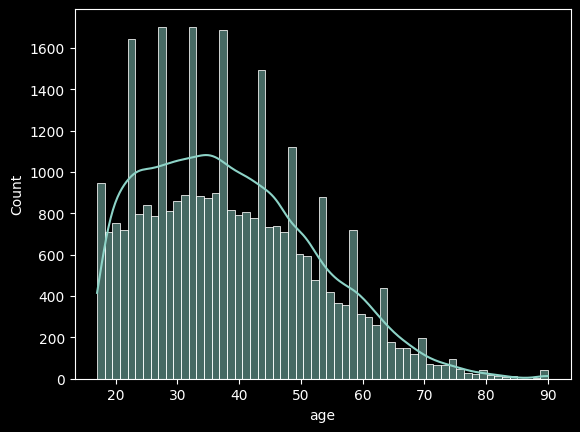

In [27]:
#univariate analysis 
sns.histplot(data=df['age'],kde=True);

<Axes: xlabel='education'>

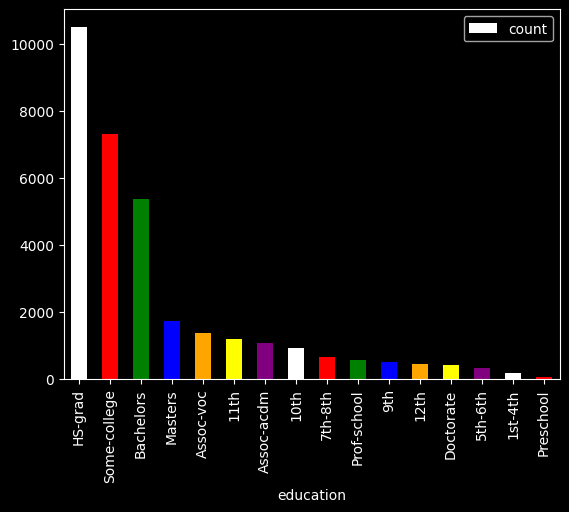

In [31]:
df['education'].value_counts() 
colors = ["white","red", "green", "blue", "orange", "yellow", "purple"]  
df.education.value_counts().plot.bar(color=colors,legend=True) 

<AxesSubplot: >

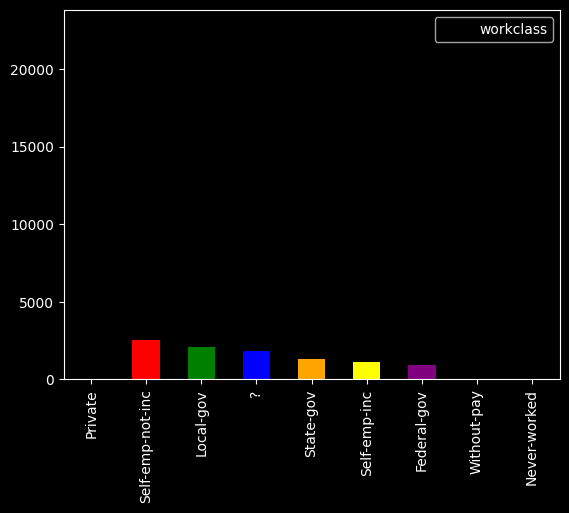

In [13]:
df['workclass'].value_counts()
colors = ["black","red", "green", "blue", "orange", "yellow", "purple"] 
df.workclass.value_counts().plot.bar(color=colors,legend=True)

In [14]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

<AxesSubplot: >

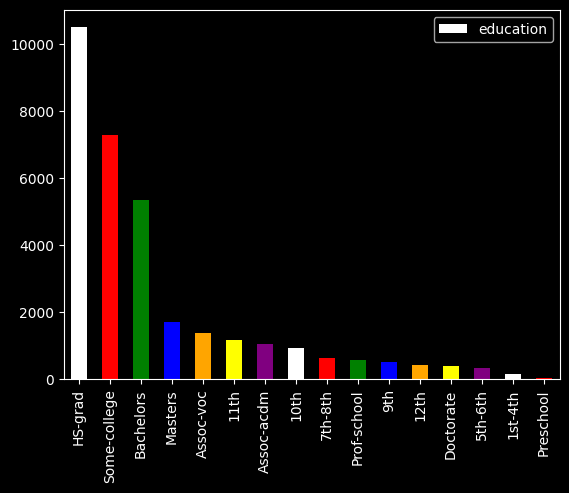

In [15]:
df['education'].value_counts()
colors = ["white","red", "green", "blue", "orange", "yellow", "purple"] 
df.education.value_counts().plot.bar(color=colors,legend=True)

<Axes: xlabel='workclass'>

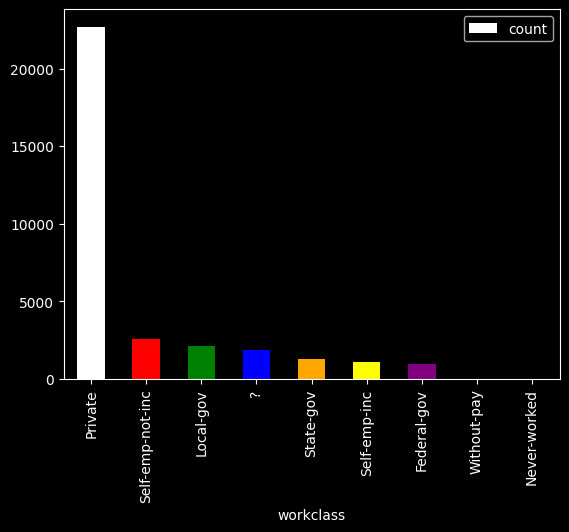

In [32]:
df['workclass'].value_counts()
colors = ["white","red", "green", "blue", "orange", "yellow", "purple"] 
df.workclass.value_counts().plot.bar(color=colors,legend=True)

In [33]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

<Axes: xlabel='income'>

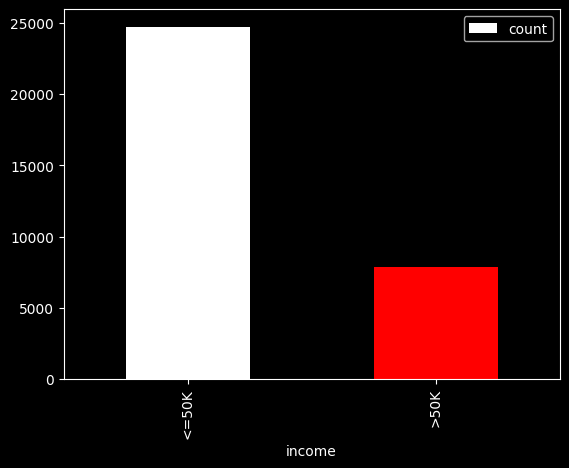

In [34]:
df['income'].value_counts()
colors = ["white","red", "green", "blue", "orange", "yellow", "purple"] 
df.income.value_counts().plot.bar(color=colors,legend=True)

<AxesSubplot: xlabel='education', ylabel='Count'>

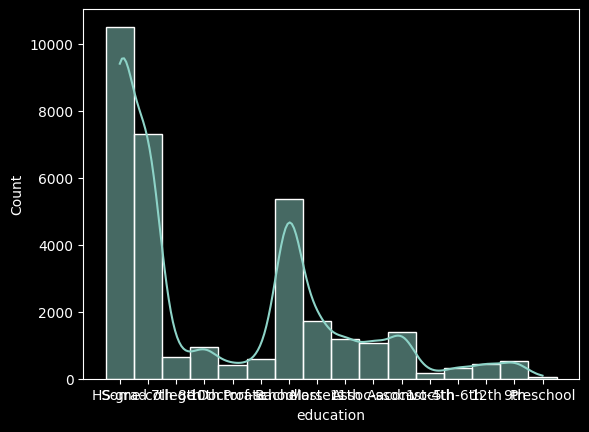

In [25]:
#univariate analysis
sns.histplot(data=df['education'],kde=True)

### Bivariate Analysis

<Axes: xlabel='age', ylabel='Count'>

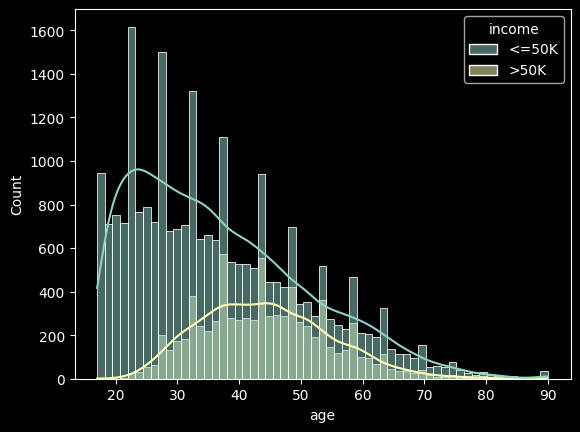

In [35]:
#Bivariate analysis of age and income 
sns.histplot(data=df,kde=True,x='age',hue='income')

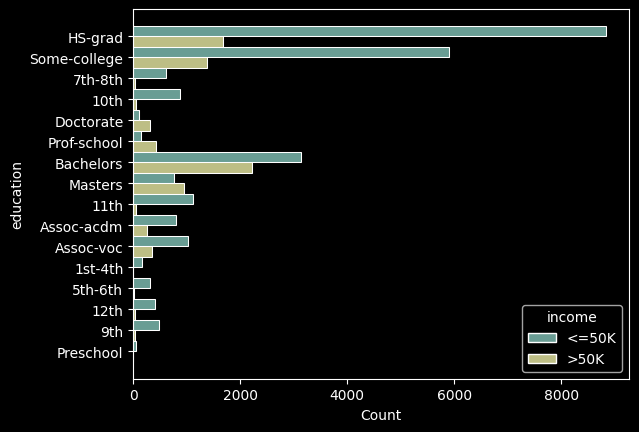

In [37]:
#Bivariate Analysis of  education and Income 
sns.histplot(data=df,y="education" ,hue="income" ,multiple="dodge"); 

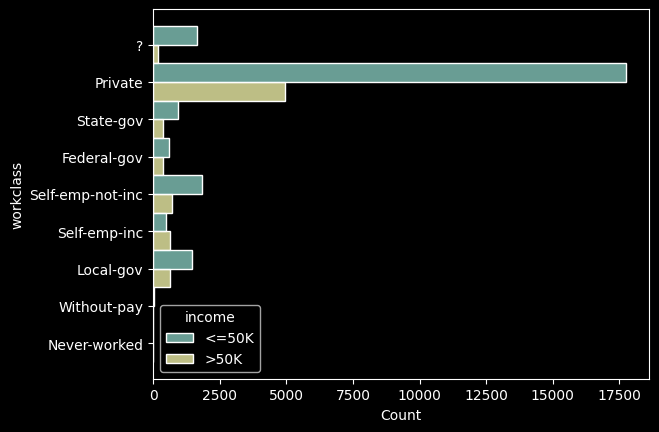

In [39]:
#Bivariate Analysis of work class and Income 
sns.histplot(data=df,y='workclass', hue='income',multiple="dodge");

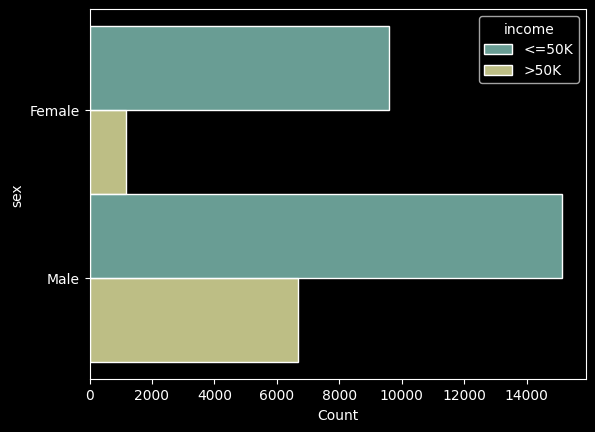

In [41]:
#Bivariate Analysis of  Sex and Income 
sns.histplot(data=df,y='sex', hue='income',multiple="dodge"); 